In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
diabetes.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [32]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
for col in diabetes.select_dtypes(include='object'):
    print('')
    print(diabetes[col].value_counts())
    print('')
    print('---------------------------')


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

---------------------------

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

---------------------------


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


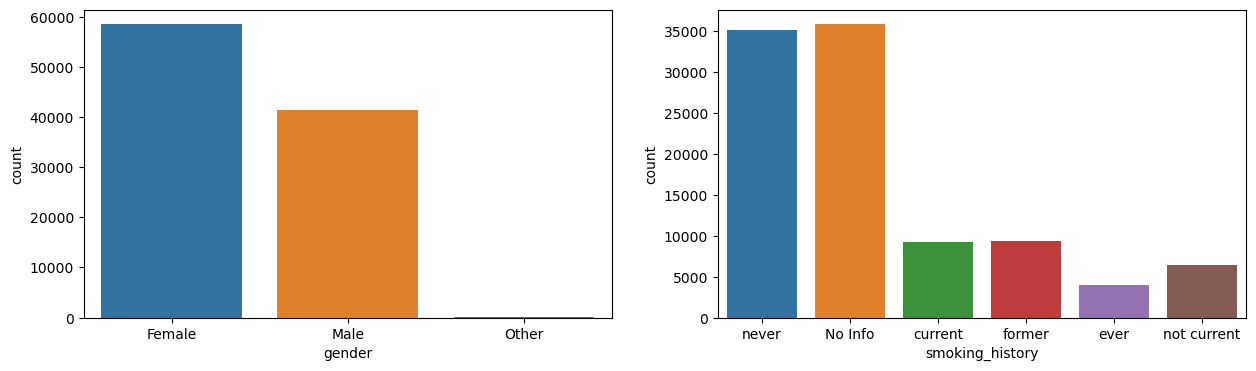

In [17]:
plt.figure(figsize=(15,4))
for i, col in enumerate(diabetes.select_dtypes(include='object')):
    plt.subplot(1,2,(i+1))
    sns.countplot(diabetes[col])
plt.show()

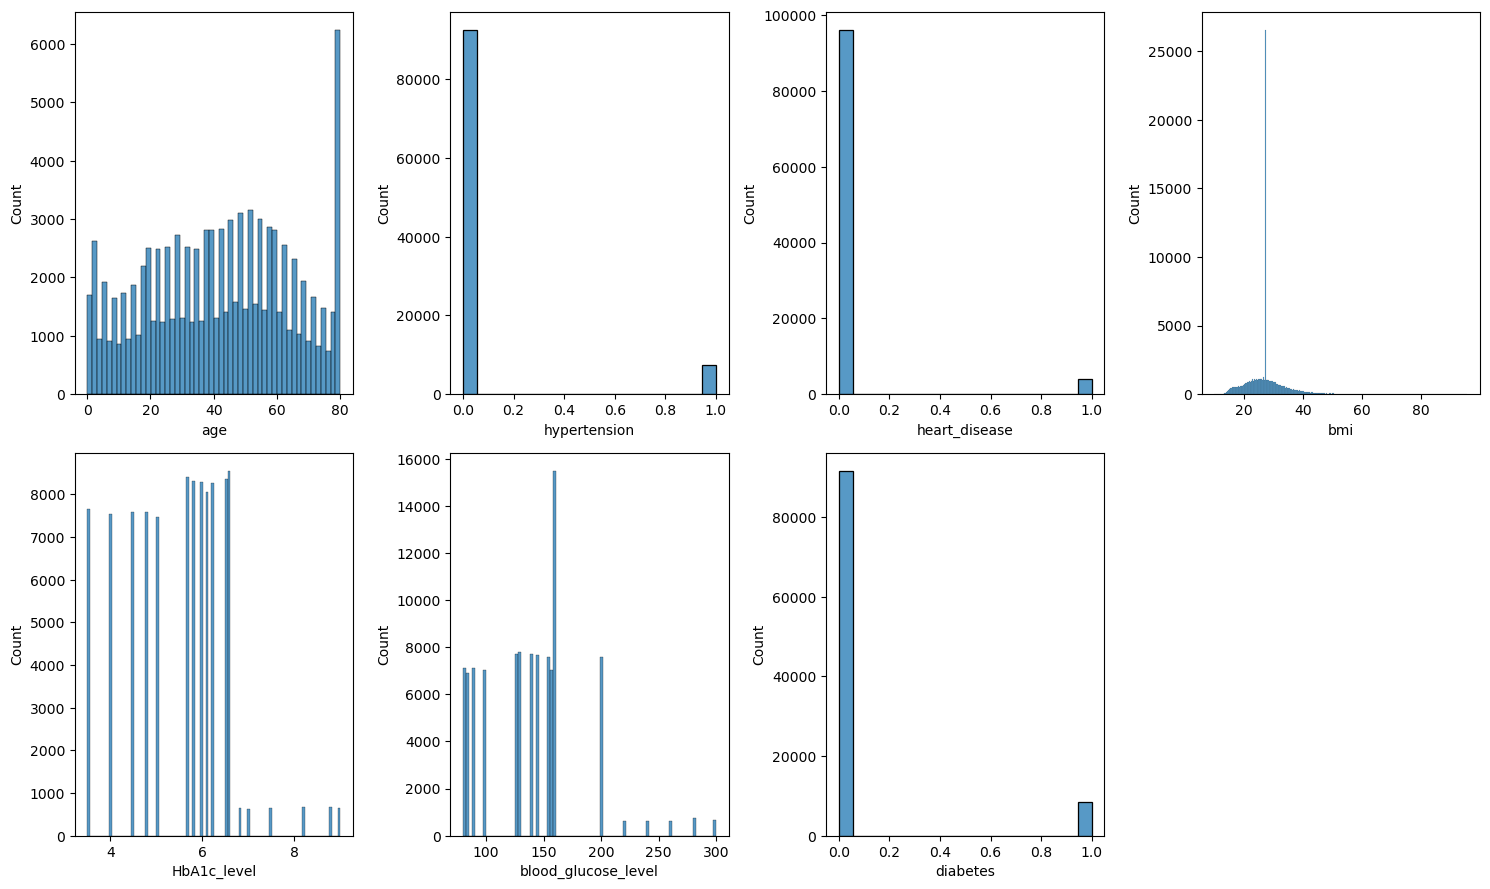

In [18]:
plt.figure(figsize=(15,9))
for i, col in enumerate(diabetes.select_dtypes(include='number')):
    plt.subplot(2,4,(i+1))
    sns.histplot(diabetes[col])
plt.tight_layout()
plt.show()

In [78]:
len(diabetes[diabetes.bmi != 27.32])

73992

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

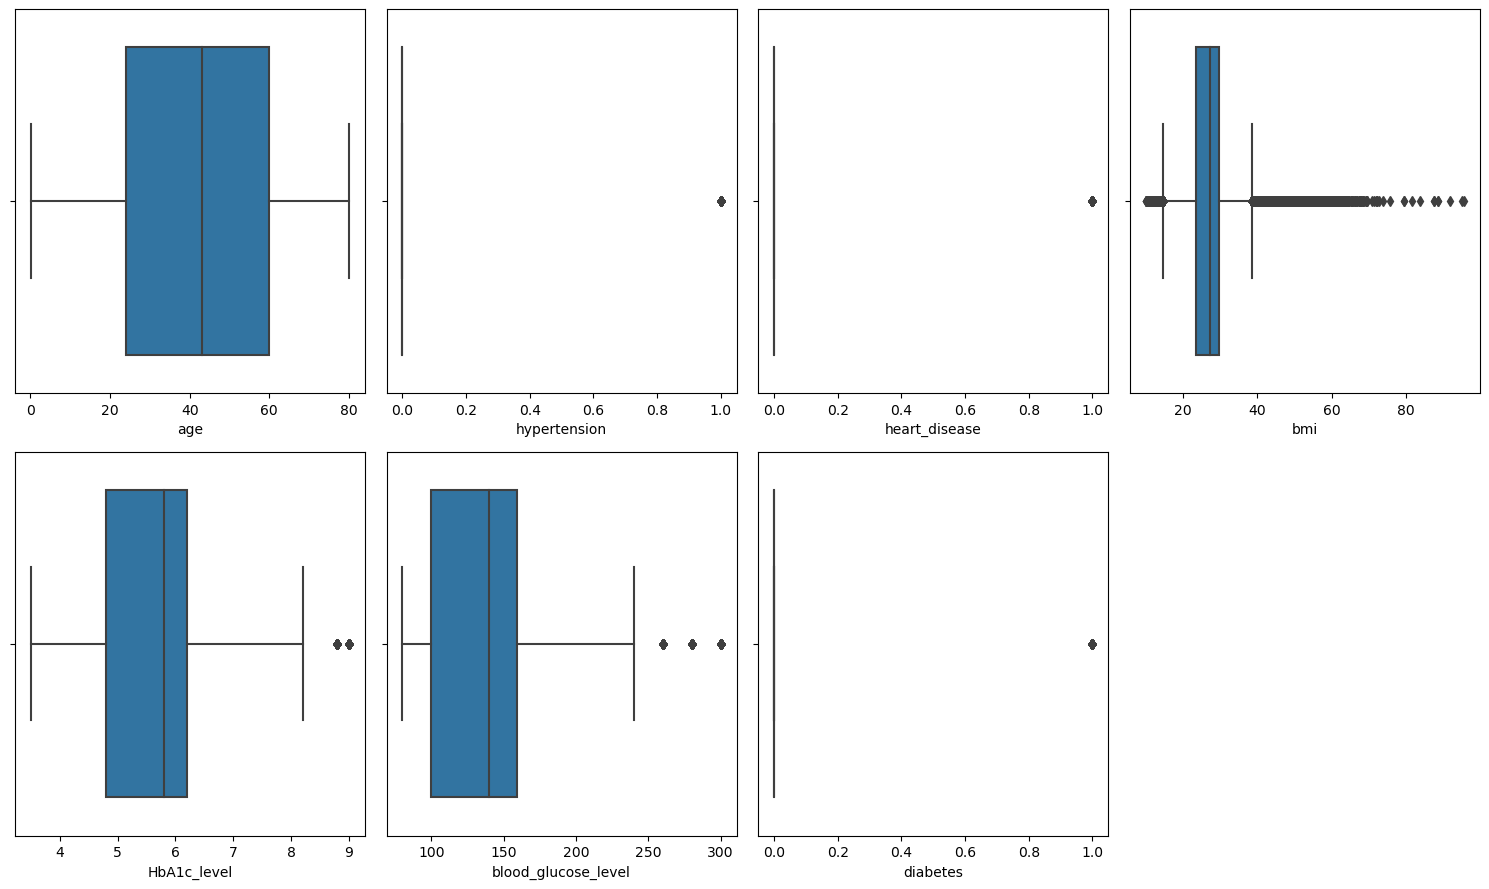

In [22]:
plt.figure(figsize=(15,9))
for i, col in enumerate(diabetes.select_dtypes(include='number')):
    plt.subplot(2,4,(i+1))
    sns.boxplot(diabetes[col])
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

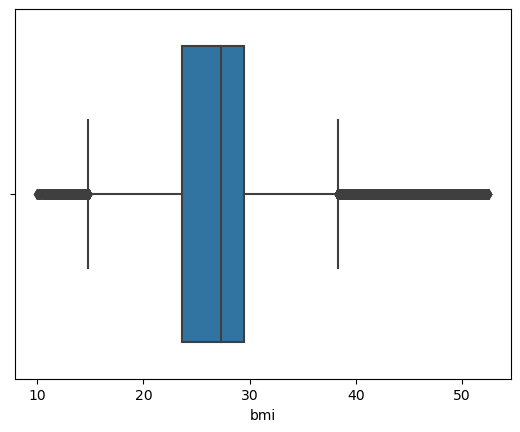

In [30]:
sns.boxplot(diabetes[diabetes.bmi < diabetes.bmi.quantile(.995)].bmi)

In [34]:
len(diabetes[diabetes.smoking_history == 'No Info']) / len(diabetes)

0.35816

In [35]:
len(diabetes[diabetes.gender == 'Other']) / len(diabetes)

0.00018

Things to do:

- Fix age so it's rounded to the nearest whole number and converted to integer
- Drop smoking_history for MVP since No Info makes up 36% the dataset.
- Given the oddly high amount of occurences, remove all BMI values that are exactly 27.32
- Reduce BMI to snip out top .05% of values
- Drop "Other" from gender since it's only .02% of dataset
- Keeping 0s and 1s in hypertension, heart disease, and diabetes, will relabel to Yes and No to clarify during exploration on graphs alone.

In [38]:
diabetes.age = round(diabetes.age, 0).astype(int)

In [39]:
diabetes = diabetes.drop(columns='smoking_history')

In [80]:
diabetes = diabetes[diabetes.bmi != 27.32]

In [40]:
diabetes = diabetes[diabetes.bmi < diabetes.bmi.quantile(.995)]

In [45]:
diabetes = diabetes[diabetes.gender != 'Other']

In [81]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73992 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               73992 non-null  object 
 1   age                  73992 non-null  int64  
 2   hypertension         73992 non-null  int64  
 3   heart_disease        73992 non-null  int64  
 4   bmi                  73992 non-null  float64
 5   HbA1c_level          73992 non-null  float64
 6   blood_glucose_level  73992 non-null  int64  
 7   diabetes             73992 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 5.1+ MB


In [82]:
73992/100000

0.73992

We are left with 99.48% of the data

***Note! Regarding blood_glucose_level***

Looking at the Discussion Board on Kaggle, it is unclear as to how this measurement was taken. Blood glucose tests have an additional parameter as to whether or not the patient was fasting when this value was obtained. Fasting/no fasting greatly influences this value. However, for MVP, this will remain in the dataframe at least through exploration.

From Kaggle:
> The dataset does not specify whether the glucose levels represent the last blood glucose check of a 2-hour glucose tolerance test or the first check after an eight-hour fasting. Instead, the measurements seem to be taken without specific fasting requirements or as part of a standardized test.

In [53]:
def split_data(df, target):
    '''
    Takes in a DataFrame and returns train, validate, and test DataFrames; stratifies on target argument.
    
    Train, Validate, Test split is: 60%, 20%, 20% of input dataset, respectively.
    '''
    # First round of split (train+validate and test)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])

    # Second round of split (train and validate)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test

In [83]:
train, validate, test = split_data(diabetes, 'diabetes')

In [84]:
train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
52996,Male,39,0,0,25.57,5.8,200,0
94575,Male,34,0,0,24.99,6.5,158,0
44599,Male,44,0,0,32.69,4.8,126,0
98479,Male,56,0,0,24.19,5.7,145,0
32961,Male,32,0,0,24.29,4.8,100,0


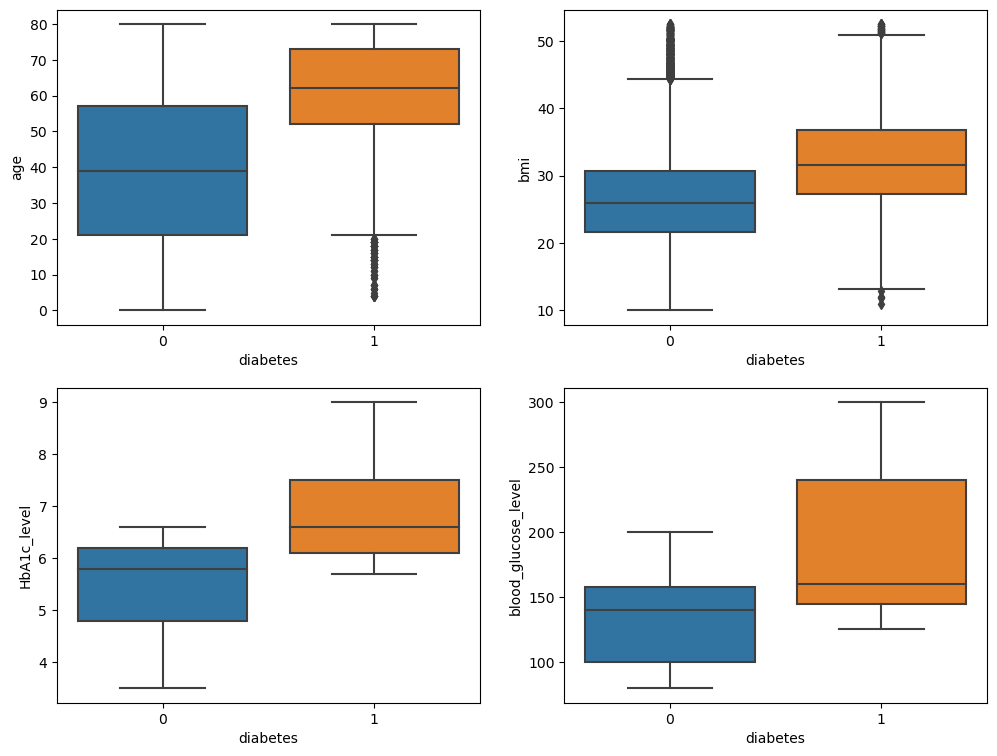

In [89]:
plt.figure(figsize=(12,9))
for i, col in enumerate(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]):
    if col != 'diabetes':
        plt.subplot(2,2,(i+1))
        sns.boxplot(data=train, x='diabetes', y=col)
plt.show()

In [66]:
train.gender.value_counts()

Female    34885
Male      24803
Name: gender, dtype: int64

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
train[['gender', 'diabetes']].plot(ax=axes[0], kind='bar')
train[['hypertension', 'diabetes']].plot(ax=axes[1], kind='bar')
train[['heart_disease', 'diabetes']].plot(ax=axes[2], kind='bar');

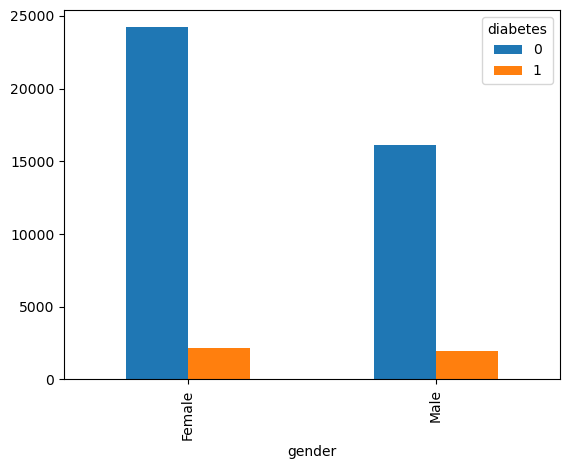

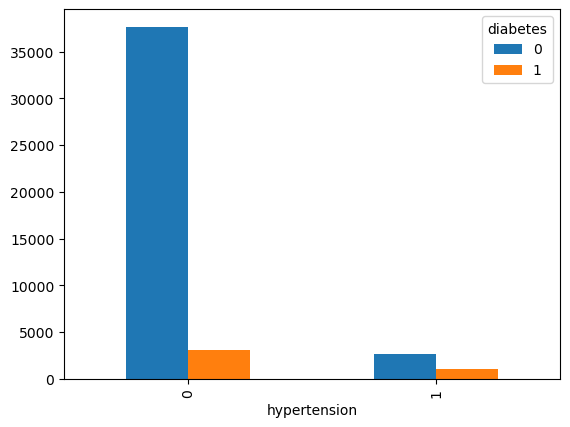

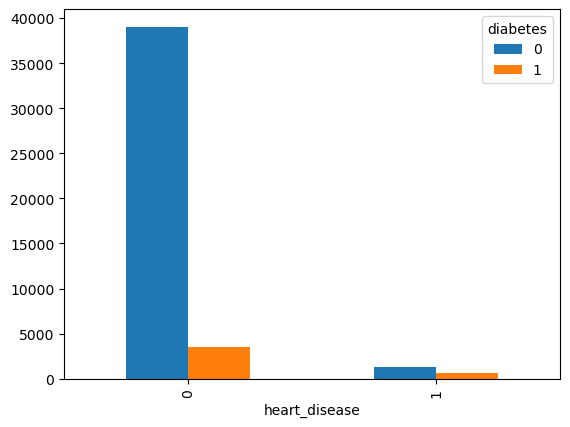

In [117]:
# plt.figure(figsize=(12,9))
for i, col in enumerate(train[['gender', 'hypertension', 'heart_disease', 'diabetes']]):
    if col != 'diabetes':
#         plt.subplot(1,3,(i+1))
        pct = pd.crosstab(train[col], train.diabetes)
        pct.plot.bar()
    
    plt.show()

In [122]:
from itertools import combinations

pairwise_combinations = list(combinations(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].columns, 2))

pairwise_combinations

[('age', 'bmi'),
 ('age', 'HbA1c_level'),
 ('age', 'blood_glucose_level'),
 ('bmi', 'HbA1c_level'),
 ('bmi', 'blood_glucose_level'),
 ('HbA1c_level', 'blood_glucose_level')]

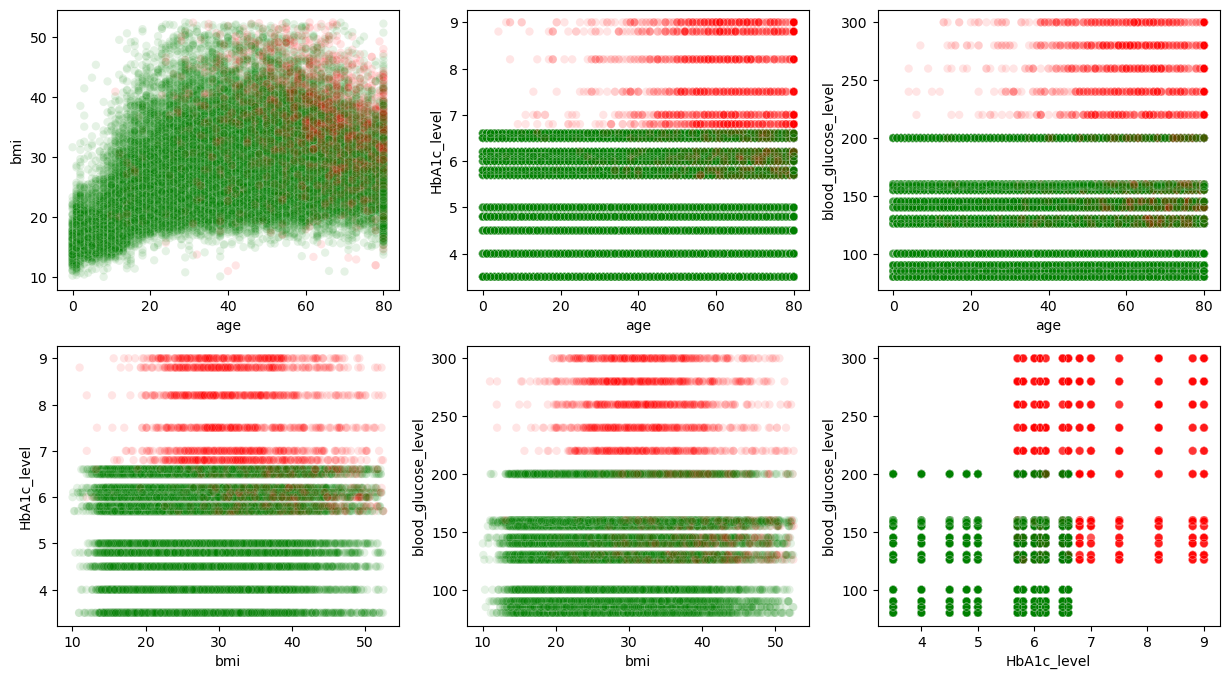

In [128]:
plt.figure(figsize=(15, 8))
x=1
for i in pairwise_combinations:
    plt.subplot(2,3,x)
    sns.scatterplot(data=train, x=i[0], y=i[1], hue='diabetes', palette=['green', 'red'], alpha=0.1)
    plt.legend([], [], frameon=False)
    x = x+1

plt.show()

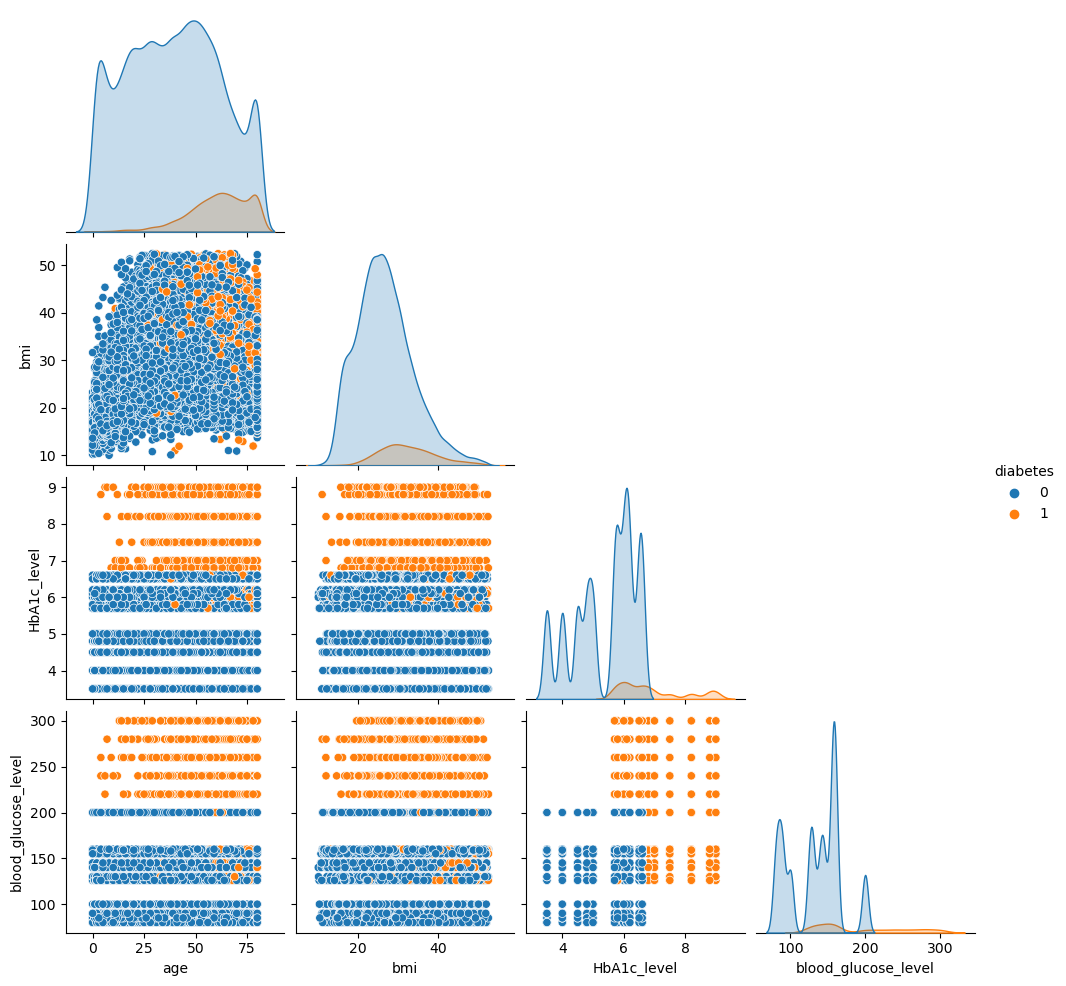

In [129]:
sns.pairplot(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', corner=True)
plt.show()

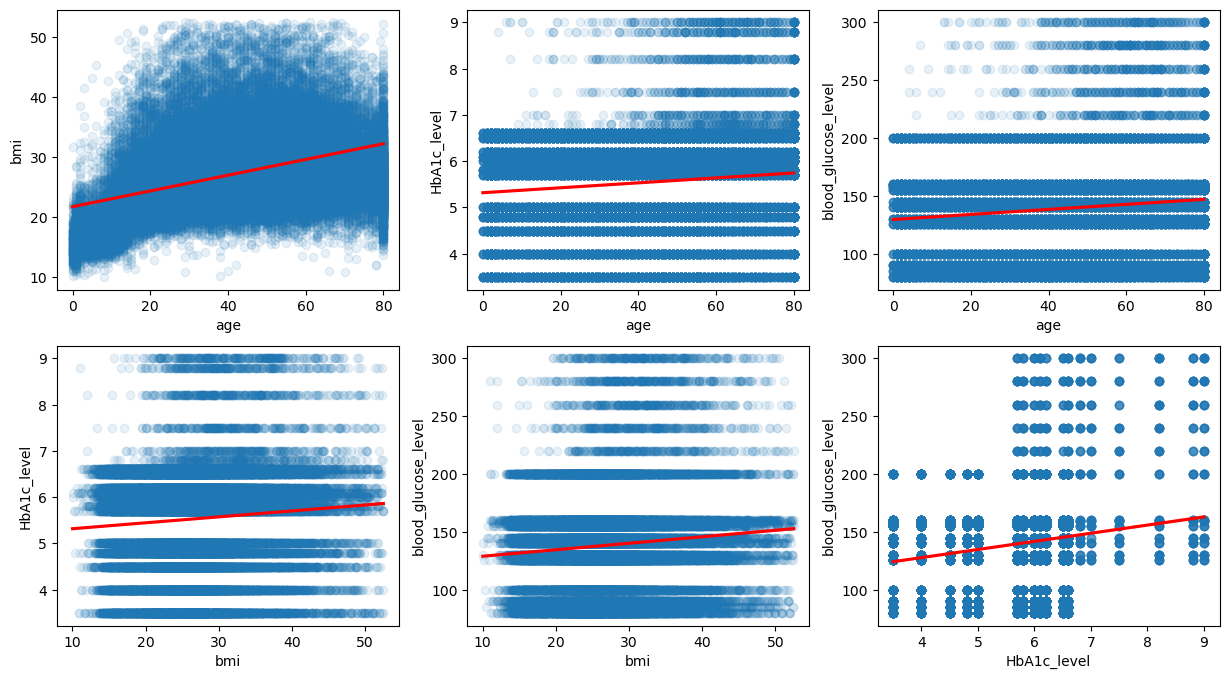

In [136]:
plt.figure(figsize=(15, 8))
x=1
for i in pairwise_combinations:
    plt.subplot(2,3,x)
    sns.regplot(data=train, x=i[0], y=i[1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})
    plt.legend([], [], frameon=False)
    x = x+1

plt.show()

Stats Tests to Run:

For Multicollinearity:
    HbA1c and blood-glucose_level
    Age and BMI
    
For Statistical Significance with Target:
    Chi-Squared:
        - 